In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.9 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

In [ ]:
def apply_pca(channel, n_components):
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(channel)
    reconstructed = pca.inverse_transform(transformed)
    return reconstructed

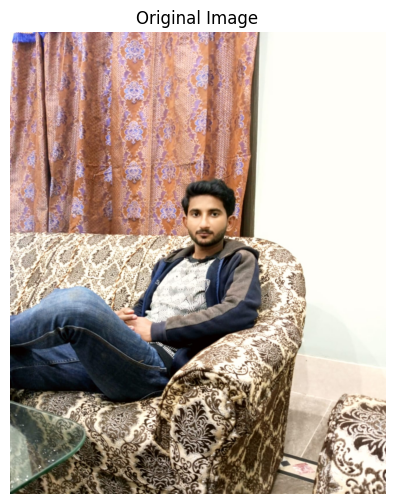

In [ ]:
img_bgr = cv2.imread('img.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#mg_rgb = cv2.resize(img_rgb, (192,192))

plt.figure(figsize=(8, 6))
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

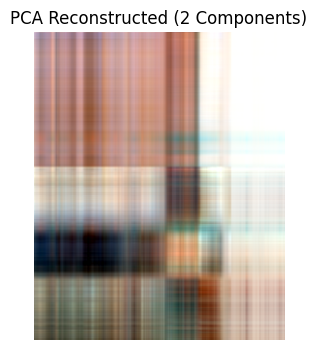

In [ ]:
r, g, b = cv2.split(img_rgb)
r_pca2 = apply_pca(r, 2)
g_pca2 = apply_pca(g, 2)
b_pca2 = apply_pca(b, 2)

recon_pca2 = cv2.merge((r_pca2, g_pca2, b_pca2))
recon_pca2 = np.clip(recon_pca2, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.title("PCA Reconstructed (2 Components)")
plt.imshow(recon_pca2)
plt.axis('off')
plt.show()

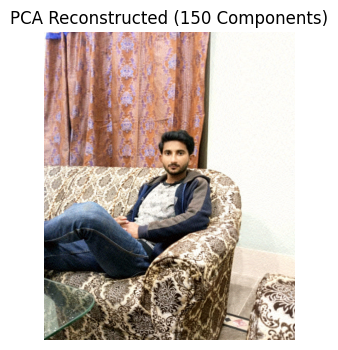

In [ ]:
r_pca150 = apply_pca(r, 150)
g_pca150 = apply_pca(g, 150)
b_pca150 = apply_pca(b, 150)


recon_pca150 = cv2.merge((r_pca150, g_pca150, b_pca150))
recon_pca150 = np.clip(recon_pca150, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.title("PCA Reconstructed (150 Components)")
plt.imshow(recon_pca150)
plt.axis('off')
plt.show()

In [ ]:
recon_pca150 = cv2.merge((r_pca150, g_pca150, b_pca150))
print(recon_pca150)

[[[253.61999979 246.14708562 247.84885512]
  [256.44552079 254.00270221 255.95645899]
  [260.92327809 265.60676257 264.85607572]
  ...
  [267.34297083 261.34581677 251.28677628]
  [266.4355265  259.91769619 249.73464766]
  [264.69220321 258.51052874 248.79919369]]

 [[253.27690544 245.02839509 248.12192838]
  [255.82257205 251.56499357 254.93548378]
  [259.81564033 261.51041092 262.24936903]
  ...
  [265.45979467 258.1306497  247.65010913]
  [265.28283344 257.44112774 246.74367687]
  [264.22613484 256.71163159 246.4361537 ]]

 [[249.05830941 241.83124268 244.99059934]
  [252.09104932 247.36573875 250.46161595]
  [255.48703878 254.88922914 255.81218927]
  ...
  [261.71733074 253.02507353 242.36256394]
  [262.46431693 253.55002631 242.60262501]
  [262.2384866  253.79073407 243.23543296]]

 ...

 [[ 15.4338379   33.00709423  23.58255596]
  [ 15.94680884  34.2788544   22.80353277]
  [ 13.97151747  34.48162456  18.95873234]
  ...
  [135.59851807 110.43141766  87.82904116]
  [127.06535636 10